
## 01MIAR - Actividad Video Valencia Pollution

## NumPy y Pandas

### Objetivos:
- Aplicar diferentes técnicas de tratamiento de estructuras numéricas con Numpy y datos estructurados con Pandas.

### Instrucciones:
- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación. Siempre será tenido en cuenta cualquier detalle técnico avanzado o no visto en clase relacionado con el tema (explicar el porqué y usabilidad).
- No está permitido compartir los resultados ni el código en ninguno de los foros.
- Revisar los temas así como las sesiones sobre Numpy y Pandas para aplicar dichos contenidos.
- Proponer las respuestas en las celdas a dicho efecto en cada punto, si se necesitan más celdas añadirlas en su sitio correspondiente
- Mostrar de manera clara la respuesta a las preguntas, mediante código

### Entrega:
- Este mismo notebook con las respuetas

### Evaluación
- Esta actividad corresponde con el 10% de la nota final de la asignatura.

### Fecha Realización
- Convocatoria 1 - 31/05/2024 - 01/06/2024

#### Descripción
El conjunto de datos "valencia_pollution_dataset.csv" (fichero disponible adjunto a la actividad) proviene de una descarga de datos del servicio web del ayuntamiento de la ciudad de Valencia de datos abiertos.

Los datos recabados de este servicio web son de mediciones cada hora de una serie de estaciones de contaminación atmosférica.

https://valencia.opendatasoft.com/explore/dataset/estacions-contaminacio-atmosferiques-estaciones-contaminacion-atmosfericas/information/

Cada estación realiza una serie de mediciones acerca de la calidad del aire, y de ciertas sustancias que se consideran importantes para analizar la contaminación atmosférica en la ciudad.

#### Columnas para trabajar:
- objectid: id de la estación
- nombre: nombre de la estación
- dirección: dirección de la estación
- tipozona: tipo de la zona, urbana o sub urbana
- tipoemision: tráfico o fondo
- so2: niveles de dióxido de azufre
- no2: niveles de dióxido de nitrogeno
- o3: niveles de ozono
- co: niveles de monóxido de carbono
- pm10: niveles de partículas en suspensión hasta 10um
- pm25: niveles de partículas en suspensión hasta 2,5um
- fecha_carga: timestamp de la actualización de los datos
- calidad_ambiental: estimación de la calidad del aire

In [34]:
# Your imports here
# comento numpy porque al final no lo he usado
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 01
Carga de datos de csv (valencia_pollution_dataset.csv) en un DataFrame

In [36]:
# Cargar datos desde un archivo CSV
file_path = 'valencia_pollution_dataset.csv'
df = pd.read_csv(file_path)

# Mostrar una vista previa de los datos
print(df[['objectid', 'nombre', 'direccion', 'tipozona', 'tipoemision', 'so2', 'no2', 'o3', 'co', 'pm10', 'pm25', 'fecha_carga', 'calidad_ambiental']].head())

   objectid          nombre                              direccion tipozona  \
0        26  Pista de Silla                      C/ Filipinas, s/n   Urbana   
1        28         Viveros                    Jardines de Viveros   Urbana   
2       431       Olivereta  Av. del Cid amb Av. de les Tres Creus   Urbana   
3       432         Patraix                Archiduque Carlos, 84ac   Urbana   
4        23         Francia                   Avda. de Francia, 60   Urbana   

  tipoemision  so2  no2    o3   co  pm10  pm25                fecha_carga  \
0     Tráfico  0.0   10  71.0  0.7   8.0   3.0  2024-05-24T20:20:06+00:00   
1       Fondo  0.0    5  88.0  NaN   NaN   NaN  2024-05-24T20:20:08+00:00   
2     Tráfico  NaN   24   NaN  NaN  20.0  11.0  2024-05-24T20:20:11+00:00   
3     Tráfico  NaN   15   NaN  NaN  20.0  11.0  2024-05-24T20:20:12+00:00   
4     Tráfico  1.0    3  82.0  0.1   9.0   6.0  2024-05-24T20:20:04+00:00   

      calidad_ambiental  
0  Razonablemente Buena  
1  Razonab

## 02
- ¿Cuál es el rango temporal del dataset?
- Obtención del número de estaciones que tienen un sensor para medir monóxido de carbono

In [12]:
# Rango temporal
# para hacerlo tenemos que pasar la fecha de carga de timestamp a datetime para que pueda calcular el minimo
# y el máximo
df['fecha_carga'] = pd.to_datetime(df['fecha_carga'])
rango_temporal_min = df['fecha_carga'].min()
rango_temporal_max = df['fecha_carga'].max()

rango_temporal_min, rango_temporal_max

(Timestamp('2024-05-24 20:20:04+0000', tz='UTC'),
 Timestamp('2024-05-26 10:20:13+0000', tz='UTC'))

In [26]:
# Obtener el número de estaciones que tienen un sensor para medir monóxido de carbono (co) 
# Hay que excluir los NaN porque entiendo que esos no tienen sensores
# Ojo con los duplicados
# Eliminar duplicados en la columna 'objectid'
df_no_duplicados_estaciones = df.drop_duplicates(subset='objectid')

# Contar el número de estaciones que tienen valores no nulos en la columna 'co'
num_estaciones_sensor_co = df_no_duplicados_estaciones['co'].notnull().sum()
num_estaciones_sensor_co

3

## 03

- Número de estación con la media más alta de mediciones de monóxido de carbono

In [16]:
# Primero calculamos la media de las mediciones de co por cada estación
media_co_estacion = df.groupby('objectid')['co'].mean()

# Ahora buscamos la estación con la media más alta de mediciones de co
# Utilizando los indices semanticos del tema 10 de pandas
estacion_media_co_mas_alta = media_co_estacion.idxmax()
media_co_mas_alta = media_co_estacion.max()

estacion_media_co_mas_alta, media_co_mas_alta

(26, 0.7)

## 04
Realizar el histograma de dióxido de nitrógeno de la estación del punto anterior

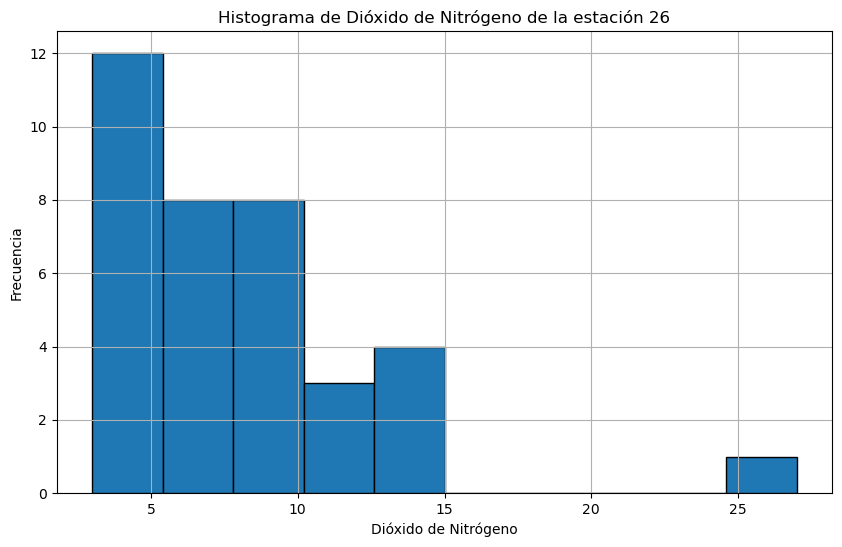

In [32]:
# Filtrar los datos para la estación con objectid 26
estacion_26 = df[df['objectid'] == 26]

# Quitar los valores NaN de la columna 'no2' 
estacion_26_no2 = estacion_26[estacion_26['no2'].isnull() == False]['no2']


plt.figure(figsize=(10, 6))
plt.hist(estacion_26_no2, bins=10, edgecolor='black')
plt.title('Histograma de Dióxido de Nitrógeno de la estación 26')
plt.xlabel('Dióxido de Nitrógeno')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

## 05
Realizar gráfica con  la línea temporal de las mediciones de ozono de la estación del punto anterior. Pista, la columna 'fecha_carga' habría que cambiarla de tipo.

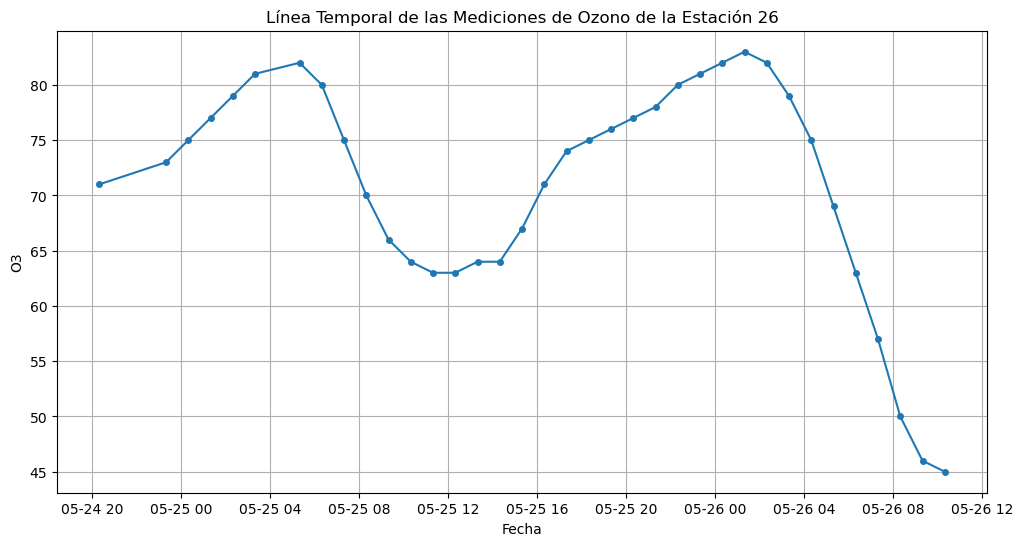

In [30]:
# Como al principio del ejercicio la 'fecha_carga' la pasamos a tipo datetime
# y para que no me de este error que me estaba dando:
# A value is trying to be set on a copy of a slice from a DataFrame.
# Try using .loc[row_indexer,col_indexer] = value instead

# se me ha ocurrido crear una copia del DataFrame de la estación 26
estacion_26_prima = estacion_26.copy()

# Asegurarse de que la columna 'fecha_carga' sea de tipo datetime en la copia
estacion_26_prima['fecha_carga'] = pd.to_datetime(estacion_26_prima['fecha_carga'])

# Crear la gráfica de la línea temporal de las mediciones de ozono (o3) para la estación 26
plt.figure(figsize=(12, 6))
plt.plot(estacion_26_prima['fecha_carga'], estacion_26_prima['o3'], marker='o', linestyle='-', markersize=4)
plt.title('Línea Temporal de las Mediciones de Ozono de la Estación 26')
plt.xlabel('Fecha')
plt.ylabel('Ozono')
plt.grid(True)
plt.show()